In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import sys
sys.path.insert(0,'../utils')
import vidtools as vt
from open_file_dialog import open_file_dialog

In [20]:
## get file paths
input_folder = '../../Data/Videos'
video_path = open_file_dialog(input_folder,'video file')
metadata_path =  open_file_dialog(input_folder,'metadata file')

print('video file: ' + video_path.split('/')[-1])
print('metadata file: ' + metadata_path.split('/')[-1])

#load video z_profile
z_profile = vt.load_z_profile(video_path)

#load metadata for video recording
metadata = pd.read_csv(metadata_path, delimiter=",")
print(metadata.head())

#process metadata
timelags = np.diff(metadata['# host_timestamps'],prepend=metadata['# host_timestamps'][0])
frame_id_diff = np.diff(metadata['frame_ids'])

2024-01-31 14:43:54.447 python[33660:9645933] +[CATransaction synchronize] called within transaction
2024-01-31 14:43:54.505 python[33660:9645933] +[CATransaction synchronize] called within transaction
2024-01-31 14:43:56.098 python[33660:9645933] +[CATransaction synchronize] called within transaction
2024-01-31 14:44:00.935 python[33660:9645933] +[CATransaction synchronize] called within transaction


video file: 300s_60Hz_15000us_4xbin_spontaneous__00_1706740950.avi
metadata file: 300s_60Hz_15000us_4xbin_spontaneous__00_metadata.csv
   # host_timestamps   dropped_frames  frame_ids  active_sequence  \
0       1.706741e+09              0.0    16026.0              0.0   
1       1.706741e+09              0.0    16027.0              0.0   
2       1.706741e+09              0.0    16028.0              0.0   
3       1.706741e+09              0.0    16029.0              0.0   
4       1.706741e+09              0.0    16030.0              0.0   

   cam_timestamps  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  


(0.0, 17999.0)

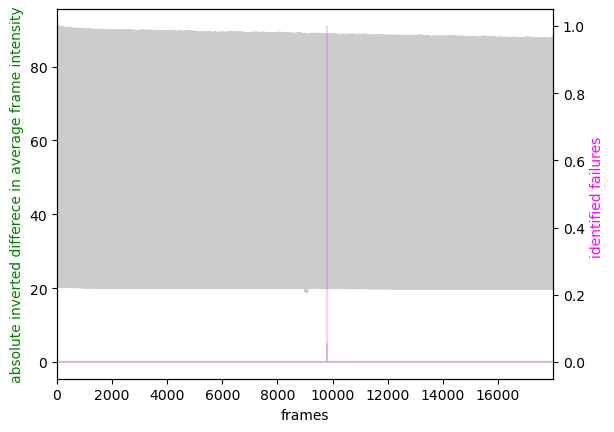

In [21]:
#failures look like the LED not switching which results in constant intensity across frames

abs_inv_diff= np.abs(np.power(np.diff(z_profile, prepend=z_profile[1]),-1)) #use the absolute value of the inverted difference to find frames with constant intensity
failures = abs_inv_diff >= np.mean(abs_inv_diff) +3*np.std(abs_inv_diff) #use a threshold to get frames with known failure

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(abs_inv_diff, 'g-',alpha=0.2)
ax1.plot(z_profile, 'k-',alpha=0.2)
ax2.plot(failures, 'magenta',alpha=0.2)

ax1.set_xlabel('frames')
ax1.set_ylabel('absolute inverted differece in average frame intensity', color='g')
ax2.set_ylabel('identified failures ', color='magenta')

plt.xlim([0,len(z_profile)])

(0.0, 17999.0)

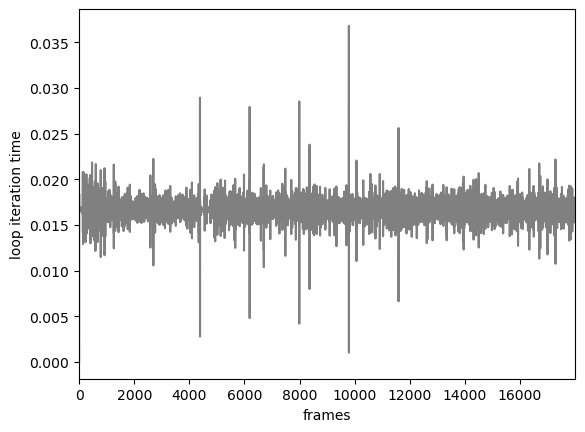

In [22]:
plt.plot(timelags,'grey')
plt.xlabel('frames')
plt.ylabel('loop iteration time')
plt.xlim((0,len(timelags)))


(0.0, 17999.0)

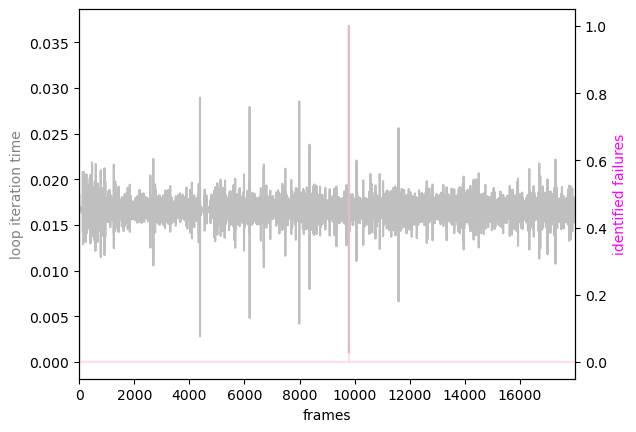

In [23]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(timelags, c='grey', alpha=0.5)
ax2.plot(failures, c='pink', alpha=0.5)

ax1.set_xlabel('frames')
ax1.set_ylabel('loop iteration time', color='grey')
ax2.set_ylabel('identified failures', color='magenta')


plt.xlim(0,len(timelags))
# plt.xlim(3300,3400)

(0.0, 17999.0)

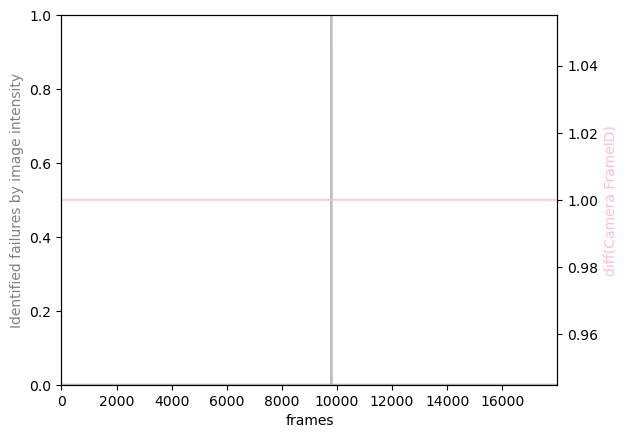

In [24]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(failures, c='grey', alpha=0.5)
ax2.plot(frame_id_diff, c='pink', alpha=0.75)

ax1.set_ylim(0,1)

ax1.set_xlabel('frames')
ax1.set_ylabel('Identified failures by image intensity', color='grey')
ax2.set_ylabel('diff(Camera FrameID)', color='pink')

plt.xlim(0,len(timelags))


(0.0, 17999.0)

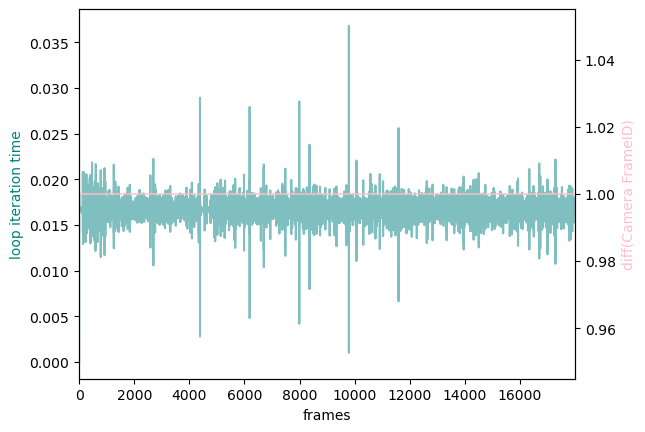

: 

In [25]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(timelags, c='teal', alpha=0.5)
ax2.plot(frame_id_diff, c='pink', alpha=0.75)

ax1.set_xlabel('frames')
ax1.set_ylabel('loop iteration time', color='teal')
ax2.set_ylabel('diff(Camera FrameID)', color='pink')

plt.xlim(0,len(timelags))
# plt.xlim(8400,8600)
